In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os
import numpy as np

import matplotlib as mpl

mpl.rcParams.update({"figure.facecolor": "white"})

In [3]:
load_dir = r'C:\Users\jason\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss'
df_dtime = pd.read_csv(load_dir + r'/eval_loss_dtimeTrue_Rho1.0E+06-1.0E+10_order5-21_shots1.00E+05_best_fit.csv')
df_pois = pd.read_csv(load_dir + r'/eval_loss_dtimeFalse_Rho1.0E+06-1.0E+10_order5-21_shots1.00E+05_best_fit.csv')

# eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
# eval_loss_pois = df_pois['Evaluation Loss'].dropna()
# percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
# optimal_C = df_dtime['Optimal Scaling Factor'].dropna()
# if use_sim_data:
#     rho = df_dtime['Rho']
# else:
#     OD = df_dtime['OD'][:-1]
#     transmit_factor = 10**(-OD)
#     eval_loss_dtime = eval_loss_dtime[:-1]
#     eval_loss_pois = eval_loss_pois[:-1]
#     percent_active = percent_active[:-1]

# # OD_C = df_dtime['Hypothetical Scaling Factor'][:-1]

In [4]:
df_dtime

,Unnamed: 0,time vector,Rho100000000.0,Rho10000000000.0,Rho1200000000.0,Rho13000000.0,Rho150000000.0,Rho1700000000.0,Rho18000000.0,Rho210000000.0,...,Rho300000000.0,Rho3500000000.0,Rho36000000.0,Rho420000000.0,Rho5000000000.0,Rho51000000.0,Rho600000000.0,Rho7000000000.0,Rho73000000.0,Rho850000000.0
0,0,2.800000e-08,40.142016,79.224792,36.145659,3.467654,29.150441,75.823033,6.286585,19.396427,...,24.090142,1.763707,2.980595,9.076941e-01,198.667598,43.183318,84.810678,55.676398,399.264622,26.988411
1,1,2.802500e-08,45.171242,97.085901,42.078813,4.036589,34.091569,88.303511,7.305487,23.205864,...,28.828542,2.306277,3.256239,1.059919e+00,237.631138,49.798309,96.965730,68.100304,420.916978,32.987433
2,2,2.805000e-08,50.937493,119.222896,49.139741,4.703472,39.908282,103.109047,8.498036,27.784130,...,34.524343,3.029948,3.573489,1.251783e+00,284.655839,57.472830,111.133687,83.483498,444.188893,40.344341
3,3,2.807500e-08,57.558547,146.700145,57.561169,5.485694,46.760357,120.705758,9.894803,33.288930,...,41.374120,3.998035,3.939275,1.494706e+00,341.468709,66.381397,127.676152,102.561252,469.262796,49.369430
4,4,2.810000e-08,65.172183,180.853720,67.626669,6.403794,54.837267,141.658053,11.531847,39.910564,...,49.615108,5.296571,4.361843,1.803800e+00,410.175080,76.727731,147.023449,126.256622,496.343321,60.444047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,236,3.390000e-08,0.036766,0.013825,0.046965,87.249399,4770.001010,0.038502,2347.999466,417.667345,...,157.012124,0.012413,0.043726,1.169910e+02,0.008685,2872.687445,0.029078,0.014257,1097.034888,808.058414
237,237,3.392500e-08,0.018932,0.011590,0.014401,74.131769,4365.794966,0.012300,2247.504727,335.086388,...,120.096197,0.004436,0.008859,4.548444e+00,0.003538,2617.198326,0.010628,0.012335,996.433708,619.864865
238,238,3.395000e-08,0.009569,0.010029,0.004088,63.038595,4009.333462,0.003676,2160.660803,268.452633,...,91.616089,0.001573,0.001514,5.890868e-02,0.001402,2390.864534,0.003686,0.011061,895.867172,473.932215
239,239,3.397500e-08,0.004745,0.008980,0.001069,53.653527,3694.881584,0.001024,2086.495377,214.765381,...,69.703067,0.000558,0.000215,1.974616e-04,0.000540,2190.235121,0.001210,0.010307,795.184028,361.141692


In [5]:
rho_lst = []
col_lst = []
for col in df_dtime:
    col_lst.append(col)
    rho_lst.append(col[3:])

rho_lst = np.array(rho_lst[2:]).astype(float)

In [6]:
t = df_dtime['time vector']

In [7]:
rmse_dtime_lst = np.zeros(len(rho_lst))
rmse_pois_lst = np.zeros(len(rho_lst))
rrmse_dtime_lst = np.zeros(len(rho_lst))
rrmse_pois_lst = np.zeros(len(rho_lst))
true_rho_lst = []
fit_rate_seg_dtime_lst = []
fit_rate_seg_pois_lst = []
for i in range(len(rho_lst)):
    A = rho_lst[i]
    mu = 31.2e-9  # [s]
    sig = 500e-12  # [s]
    bg = 1e4  # [Hz]

    true_rho = A * np.exp(-1 * (t - mu) ** 2 / 2 / sig ** 2) + bg
    true_rho_lst.append(true_rho)
    
    fit_rate_seg_dtime = df_dtime[col_lst[i+2]]
    fit_rate_seg_pois = df_pois[col_lst[i+2]]
    fit_rate_seg_dtime_lst.append(fit_rate_seg_dtime)
    fit_rate_seg_pois_lst.append(fit_rate_seg_pois)
    
    rmse_dtime = np.sqrt(np.sum(((fit_rate_seg_dtime-true_rho))**2)/len(fit_rate_seg_dtime))
    rmse_dtime_lst[i] = rmse_dtime
    
    rrmse_dtime = np.sqrt(np.sum(((fit_rate_seg_dtime-true_rho)/true_rho)**2)/len(fit_rate_seg_dtime))
    rrmse_dtime_lst[i] = rrmse_dtime
    
    rmse_pois = np.sqrt(np.sum(((fit_rate_seg_pois-true_rho))**2)/len(fit_rate_seg_pois))
    rmse_pois_lst[i] = rmse_pois
    
    rrmse_pois = np.sqrt(np.sum(((fit_rate_seg_pois-true_rho)/true_rho)**2)/len(fit_rate_seg_pois))
    rrmse_pois_lst[i] = rrmse_pois



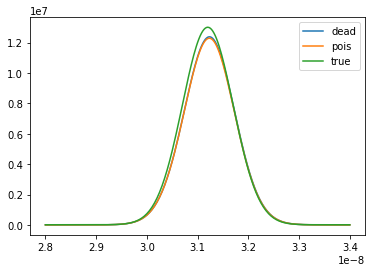

In [8]:
idx = 3

plt.plot(t, fit_rate_seg_dtime_lst[idx], label='dead')
plt.plot(t, fit_rate_seg_pois_lst[idx], label='pois')
plt.plot(t, true_rho_lst[idx], label='true')
plt.legend()
plt.show()

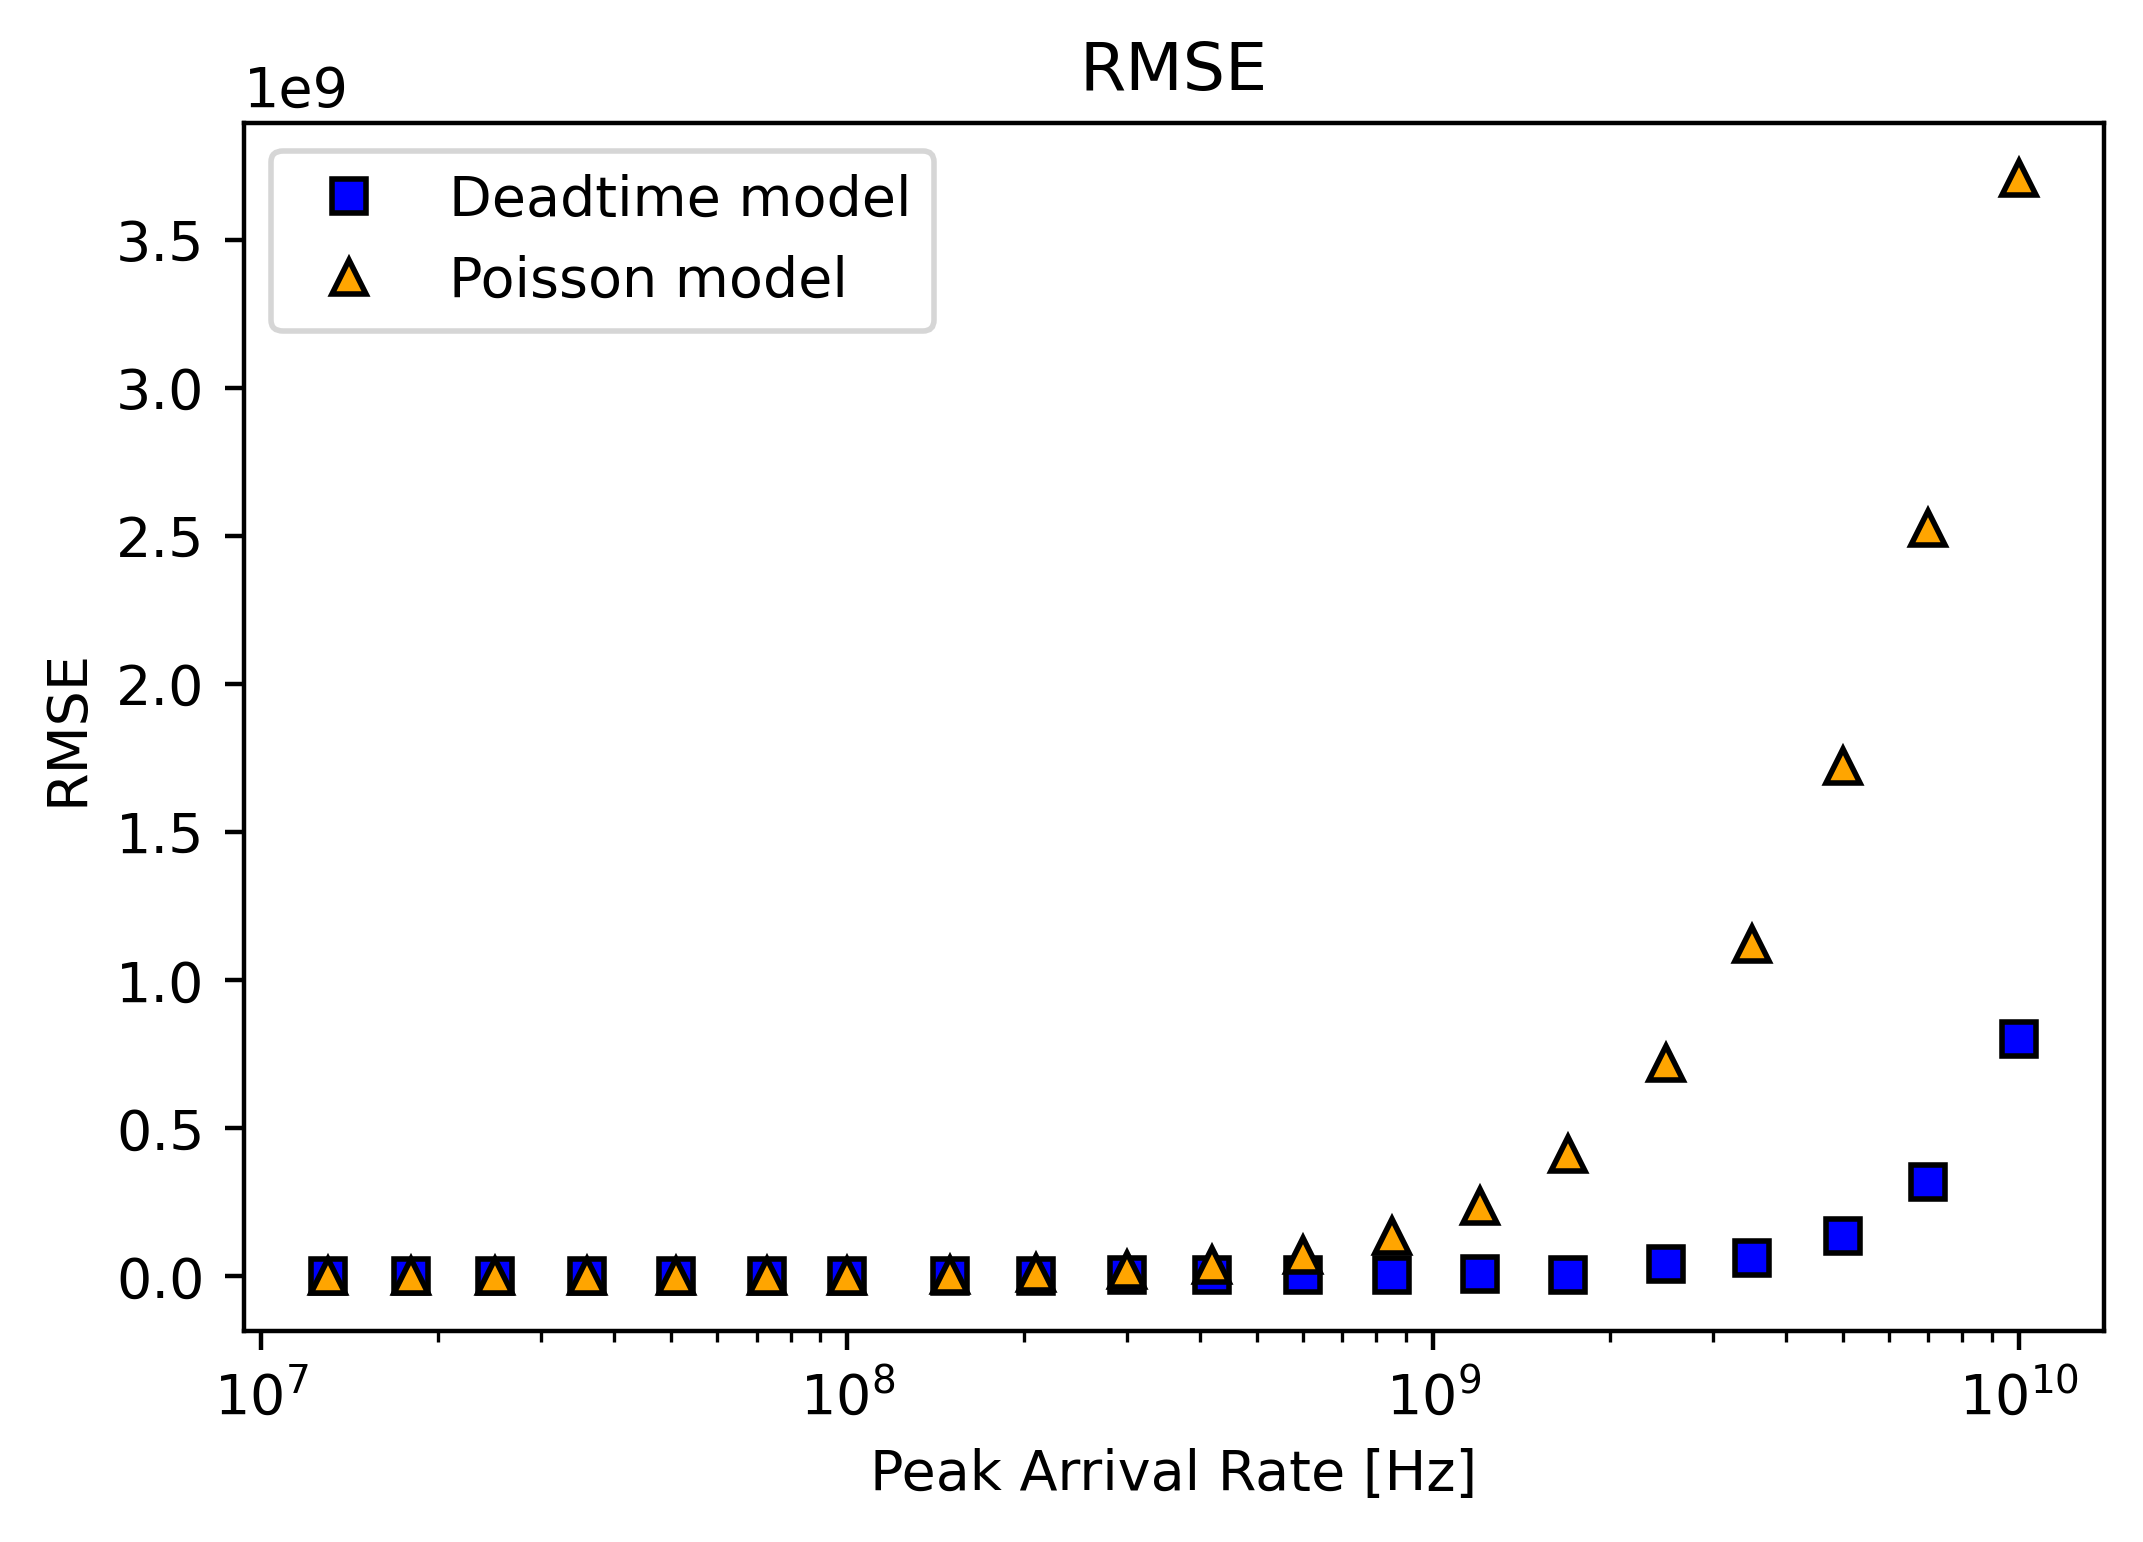

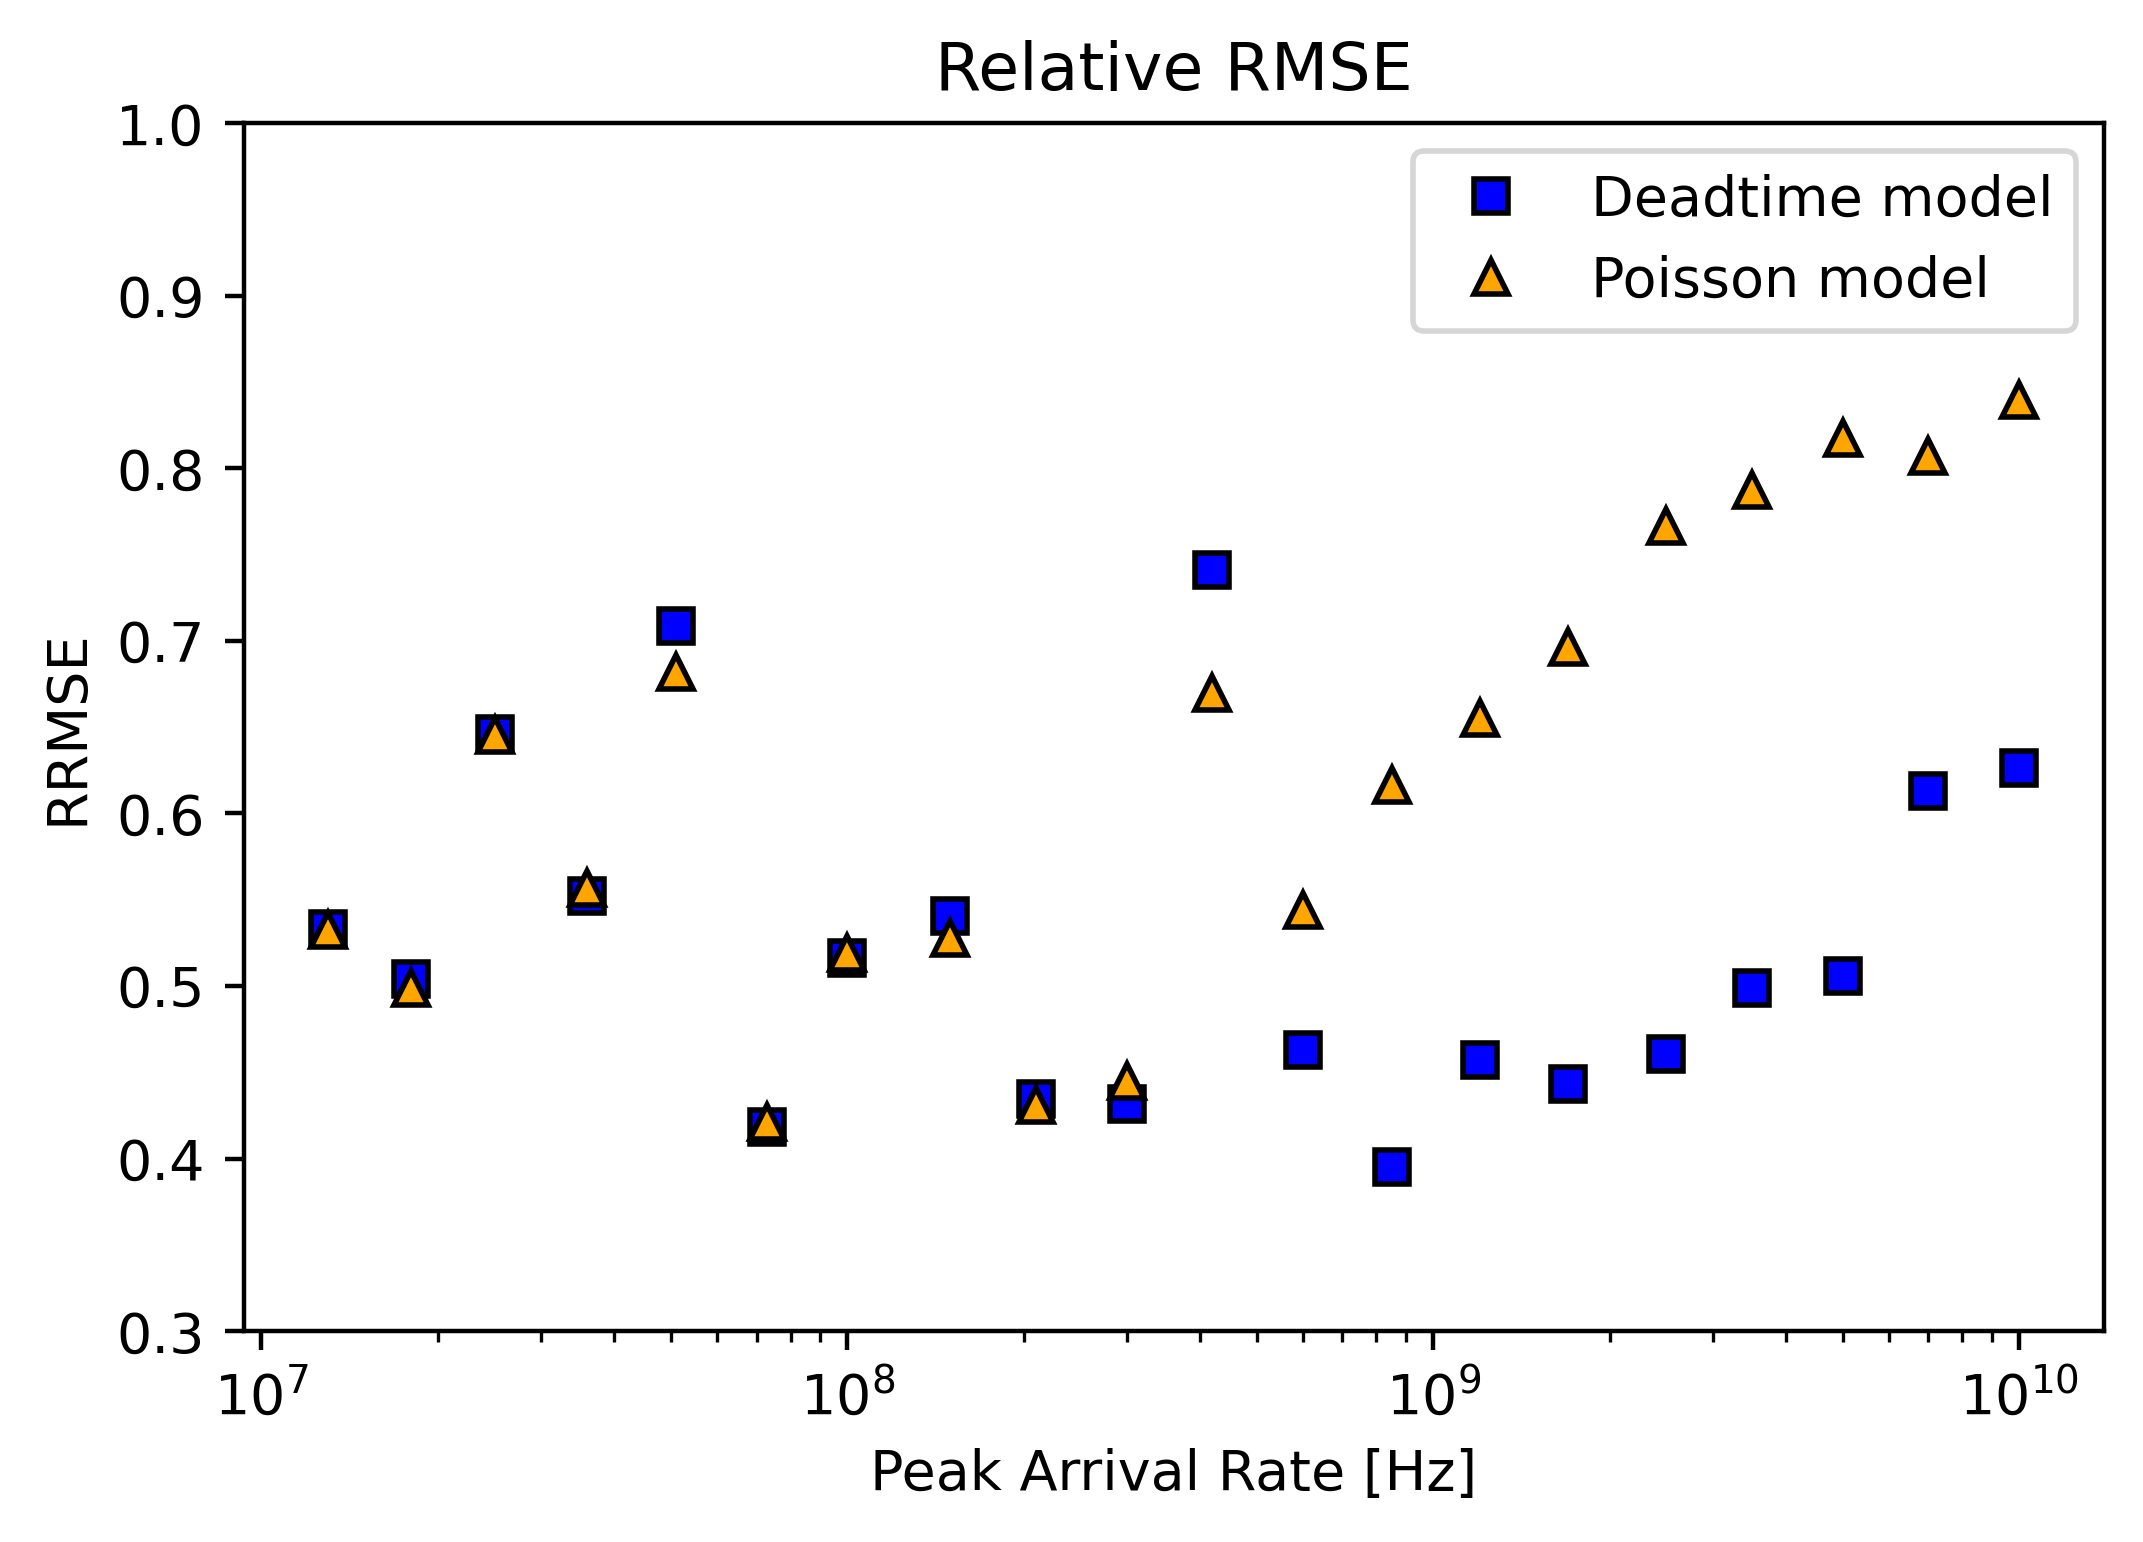

In [10]:
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.semilogx(rho_lst, rmse_dtime_lst, 's', color='blue', markeredgecolor='black', label='Deadtime model')
ax.semilogx(rho_lst, rmse_pois_lst, '^', color='orange', markeredgecolor='black', label='Poisson model')
ax.set_ylabel('RMSE')
ax.set_xlabel('Peak Arrival Rate [Hz]')
ax.set_title('RMSE')
plt.legend()
plt.show()

fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)
ax.semilogx(rho_lst, rrmse_dtime_lst, 's', color='blue', markeredgecolor='black', label='Deadtime model')
ax.semilogx(rho_lst, rrmse_pois_lst, '^', color='orange', markeredgecolor='black', label='Poisson model')
ax.set_ylabel('RRMSE')
ax.set_xlabel('Peak Arrival Rate [Hz]')
ax.set_title('Relative RMSE')
ax.set_ylim([0.3, 1.0])
plt.legend()
plt.show()